In [24]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import warnings

In [21]:
# Creating DataFrames and removing index created during feature_engineering export
X_df_ft1 = pd.read_csv("/workspace/anomaly_lte/data/x_train_processed_ft1.csv")
X_df_ft2 = pd.read_csv("/workspace/anomaly_lte/data/x_train_processed_ft2.csv")
Y_df = pd.read_csv("/workspace/anomaly_lte/data/Y_train.csv")

X_df_ft1 = X_df_ft1.iloc[:,1:]
X_df_ft2 = X_df_ft2.iloc[:,1:]
Y_df = Y_df.iloc[:,1:]

In [19]:
# Obtaining models
with open(f'models/train_dtree_ft1.pkl', 'rb') as model_file:
    dtree_ft1 = pickle.load(model_file)

with open(f'models/train_dtree_ft2.pkl', 'rb') as model_file:
    dtree_ft2 = pickle.load(model_file)

with open(f'models/train_xgboost_ft1.pkl', 'rb') as model_file:
    xgboost_ft1 = pickle.load(model_file)

with open(f'models/train_xgboost_ft2.pkl', 'rb') as model_file:
    xgboost_ft2 = pickle.load(model_file)

Score for model dtree_ft1: 0.9702933405595827

Classification Report for model dtree_ft1:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21374
           1       0.97      0.92      0.94      8148

    accuracy                           0.97     29522
   macro avg       0.97      0.95      0.96     29522
weighted avg       0.97      0.97      0.97     29522


Confusion Matrix for model dtree_ft1: 
[[21180   194]
 [  683  7465]]


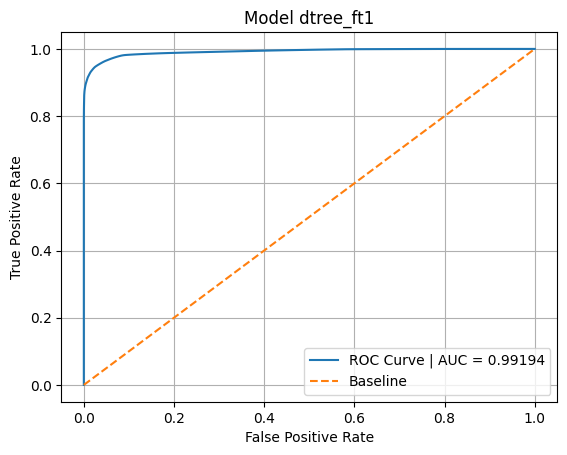

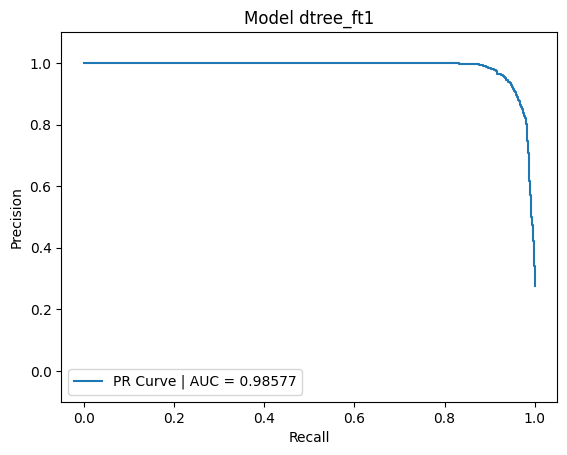

Score for model dtree_ft2: 0.9739516292934083

Classification Report for model dtree_ft2:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     21374
           1       0.98      0.92      0.95      8148

    accuracy                           0.97     29522
   macro avg       0.98      0.96      0.97     29522
weighted avg       0.97      0.97      0.97     29522


Confusion Matrix for model dtree_ft2: 
[[21250   124]
 [  645  7503]]


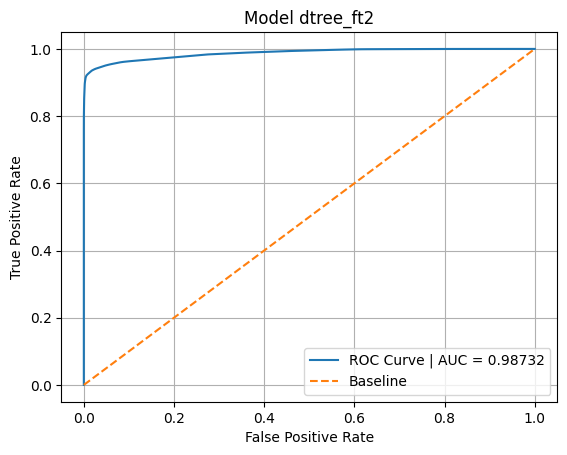

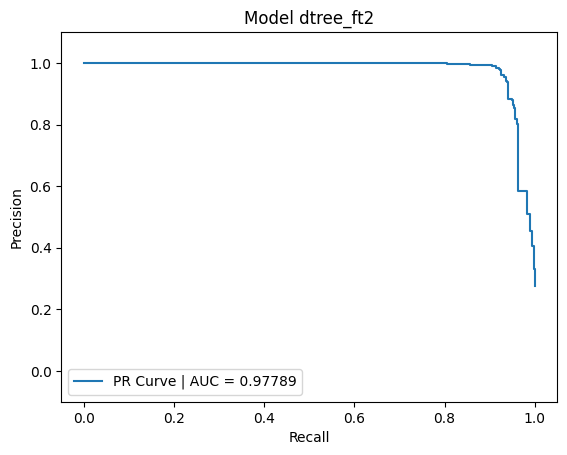

Score for model xgboost_ft1: 0.9986450782467312

Classification Report for model xgboost_ft1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21374
           1       1.00      1.00      1.00      8148

    accuracy                           1.00     29522
   macro avg       1.00      1.00      1.00     29522
weighted avg       1.00      1.00      1.00     29522


Confusion Matrix for model xgboost_ft1: 
[[21371     3]
 [   37  8111]]


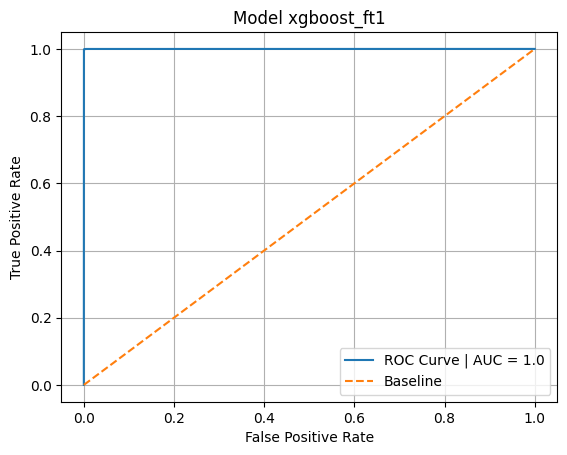

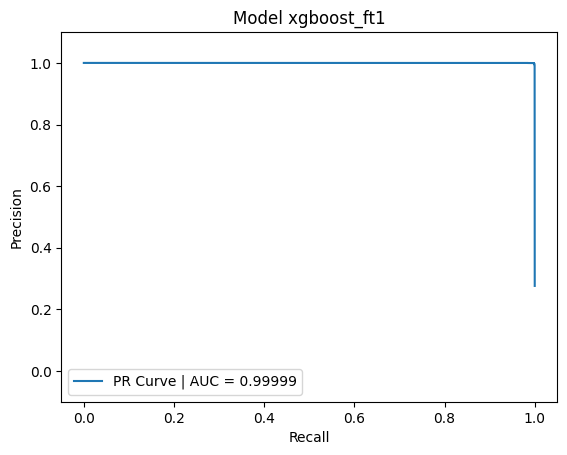

Score for model xgboost_ft2: 1.0

Classification Report for model xgboost_ft2:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21374
           1       1.00      1.00      1.00      8148

    accuracy                           1.00     29522
   macro avg       1.00      1.00      1.00     29522
weighted avg       1.00      1.00      1.00     29522


Confusion Matrix for model xgboost_ft2: 
[[21374     0]
 [    0  8148]]


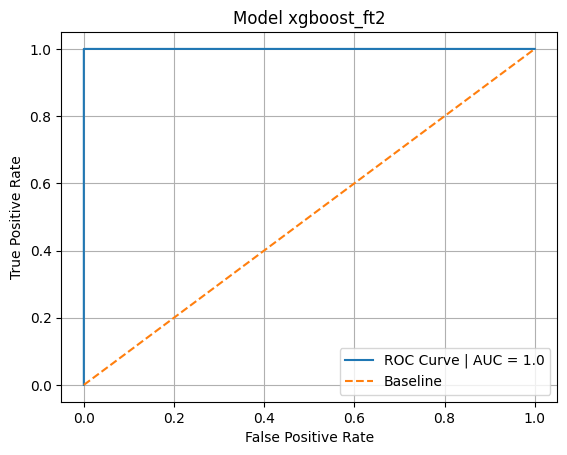

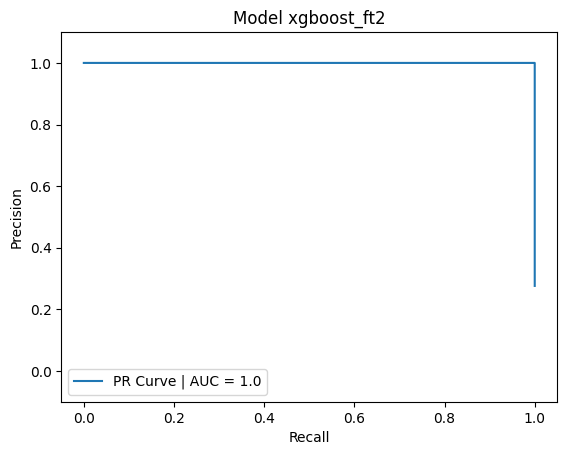

In [27]:
# Evaluating metrics for all models on training data
models = ["dtree_", "xgboost_"]
feature_sets = ["ft1", "ft2"]

for model in models:
    for feature_set in feature_sets:
        predicted_probability = globals()[f"{model}{feature_set}"].predict_proba(globals()[f"X_df_{feature_set}"])[:,1]
        predicted_outcome = globals()[f"{model}{feature_set}"].predict(globals()[f"X_df_{feature_set}"])

        # Printing Score
        score = globals()[f"{model}{feature_set}"].score(globals()[f"X_df_{feature_set}"], Y_df)
        print(f"Score for model {model}{feature_set}: {score}")

        # Printing Classification Report
        cr = classification_report(Y_df, predicted_outcome)   
        print(f"\nClassification Report for model {model}{feature_set}:\n{cr}")

        # Printing Confusion Matrix
        cm = confusion_matrix(Y_df, predicted_outcome)
        print(f"\nConfusion Matrix for model {model}{feature_set}: \n{cm}")

        # Getting ROC and AUC
        false_positive_rate, true_positive_rate, roc_thresholds = roc_curve(Y_df, predicted_probability)
        roc_auc = auc(false_positive_rate, true_positive_rate)

        # Getting PRD and AUC
        precision, recall, prd_threshold = precision_recall_curve(Y_df, predicted_probability)
        prd_auc = average_precision_score(Y_df, predicted_probability)

        # Plotting ROC Curve
        plt.plot(false_positive_rate, true_positive_rate, label = f"ROC Curve | AUC = {round(roc_auc,5)}")
        plt.plot([0,1], [0,1], linestyle = '--', label = "Baseline")
        plt.title(f"Model {model}{feature_set}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.grid()
        plt.legend()
        plt.show()

        # Plotting Precision Recall Display
        display = PrecisionRecallDisplay(precision=precision, recall=recall)
        display.plot(label = f"PR Curve | AUC = {round(prd_auc,5)}")
        plt.title(f"Model {model}{feature_set}")
        plt.ylim(-0.1,1.1)
        plt.show()

# Removing warning displays for xgboost
warnings.filterwarnings('ignore')